### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [9]:
import tensorflow as tf

#### Collect Fashion mnist data from tf.keras.datasets 

In [2]:
from tensorflow.python.keras.datasets import fashion_mnist

#Load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#### Change train and test labels into one-hot vectors

In [3]:
import pandas as pd
import numpy as np

In [4]:
pd.Series(y_test).value_counts()

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
dtype: int64

In [5]:
pd.Series(y_train).value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

In [11]:
from tensorflow.python.keras import utils


In [13]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

#### Build the Graph

In [77]:
import matplotlib.pyplot as plt

Graph drawn with the epoch Accuracy results

#### Initialize model, reshape & normalize data

In [14]:
x_test=x_test.astype('float32')

In [15]:
x_train=x_train.astype('float32')

In [16]:
x_train /= 255 #Done for normalization of data, 
x_test /= 255


In [17]:
x_train=x_train.reshape(60000,28,28,1)

In [19]:
x_train.shape

(60000, 28, 28, 1)

In [20]:
x_test=x_test.reshape(10000,28,28,1)

In [21]:
x_test.shape

(10000, 28, 28, 1)

In [59]:
import keras
from keras.models import Sequential # Sequential(flow from layer 1-->n) and Functional model(used when we want to use someone elses model)
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape #(dense--fully connected), (flatten-- convert matrix to vector)
TRAIN = False
BATCH_SIZE = 32 #how many numbers in a batch so 60000/32 = total number of batches
EPOCHS = 10

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [72]:
# Define Model
model2 = Sequential()

# Step 1 - Flattening
model2.add(Flatten())

# Step 2 - Full connection
model2.add(Dense(units = 200, activation = 'relu'))#Units means outputs of the Dense layer
model2.add(Dense(units = 100, activation = 'relu'))

    
# More Dropout
model2.add(Dropout(0.25))

    


### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [73]:
    # Prediction Layer
    model2.add(Dense(10))
    model2.add(Activation('softmax'))

    # Loss and Optimizer
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
    callback_list = [early_stopping]

   
    

In [74]:
import matplotlib.pyplot as plt

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.5187 - acc: 0.8145 - val_loss: 0.4213 - val_acc: 0.8482
Epoch 2/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.3826 - acc: 0.8611 - val_loss: 0.3796 - val_acc: 0.8617
Epoch 3/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.3463 - acc: 0.8736 - val_loss: 0.3658 - val_acc: 0.8709
Epoch 4/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.3216 - acc: 0.8809 - val_loss: 0.3480 - val_acc: 0.8706
Epoch 5/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.3060 - acc: 0.8878 - val_loss: 0.3564 - val_acc: 0.8744
Epoch 6/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.2937 - acc: 0.8910 - val_loss: 0.3350 - val_acc: 0.8775
Epoch 7/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.2782 - acc: 0.8964 - val_loss: 0.3396 - 

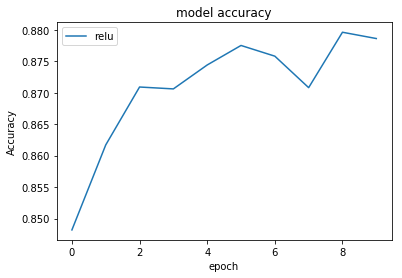

In [75]:
history = model2.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    verbose=1,
                    validation_data=(x_test, y_test))
    
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
print()
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')
    
plt.plot(history.history['val_acc'])

    
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['relu'], loc='upper left')

In [76]:
loss_and_metrics = model2.evaluate(x_test, y_test)
print(loss_and_metrics)


10000/10000 [==============================] - 0s 29us/step
[0.3443766842842102, 0.8786]
